<a href="https://colab.research.google.com/github/YasasTL/Sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/sentiment_analysis.csv')

In [ ]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [ ]:
data.shape

(7920, 3)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

1. convert uppercase to lowercase
2. remove links
3. remove punctuations
4. remove numbers
5. remove stopwords
6. stemming

In [ ]:
import re
import string # import punctuations

convert upper to lower

In [ ]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [ ]:
# data['tweet']=data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data['tweet'] = data['tweet'].str.lower()

In [ ]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove links

In [ ]:
# data['tweet']=data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*','',x,flags=re.MULTILINE) for x in x.split()))
data['tweet'] = data['tweet'].str.replace(r'http\S+', '', regex=True)

In [ ]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove punctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove(text):
  for punctuation in string.punctuation:
    text=text.replace(punctuation, '')
  return text
data['tweet']=data['tweet'].apply(remove)

In [ ]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

## remove numbers

In [ ]:
data['tweet']=data['tweet'].str.replace('\d+','',regex=True)

In [ ]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## remove stopwords

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
for i in stop_words:
  print(i)


having
mightn
aren
am
most
the
an
no
out
what
does
you'll
yourselves
she's
on
was
yourself
they
it
up
each
down
wasn
himself
he
wouldn
between
hers
above
other
her
and
further
had
some
that
where
should
more
myself
aren't
very
shouldn't
both
didn
few
wouldn't
be
until
herself
you're
didn't
t
won
m
doing
him
over
ours
did
will
your
doesn
if
hasn
needn
mustn't
such
me
don't
isn
as
haven't
from
couldn
you
into
during
but
through
its
ain
been
mightn't
theirs
when
is
nor
y
shouldn
after
yours
themselves
just
mustn
off
all
should've
those
don
we
these
you've
are
our
it's
s
have
ll
haven
ma
d
needn't
hadn't
how
his
then
has
which
that'll
again
whom
them
weren
itself
there
in
hadn
doesn't
once
won't
not
ourselves
under
shan
own
being
here
so
at
ve
isn't
she
about
before
or
below
of
wasn't
do
can
who
their
this
you'd
by
o
weren't
were
only
couldn't
hasn't
i
shan't
to
re
any
for
while
same
my
now
a
against
why
too
than
because
with


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
data['tweet'] = data['tweet'].apply(remove_stopwords)

In [ ]:
data['tweet'].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## stemming

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [ ]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [ ]:
data['tweet'].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [ ]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


## Building Vocabulary

In [ ]:
from collections import Counter
vocab = Counter()

In [ ]:
#example
# vocab.update(['java','python','java','R'])
# vocab

In [ ]:
for sentence in data['tweet']:
  # print(sentence)
  vocab.update(sentence.split())

In [ ]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [ ]:
print(len(data['tweet']))
print(len(vocab))
print(len(data))

7920
15902
7920


### No of uniq words are 15904. But no of data records are 7920. this can be overfitted coz no of features are higher than no of data sets

In [ ]:
tokens=[key for key in vocab if vocab[key]>10]

In [ ]:
len(tokens)

1146

In [ ]:
tokens

## devide dataset

In [ ]:
X=data['tweet']
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Vectorization

In [ ]:
def vec(ds,vocabulary):
  vectorized_list=[]

  for sentence in ds:
    sentence_list=np.zeros(len(vocabulary))

    for i in range(len(vocabulary)):
      if vocabulary[i] in sentence.split():
        sentence_list[i]=1

    vectorized_list.append(sentence_list)

  vectorized_list_new=np.asarray(vectorized_list,dtype=np.float32)

  return vectorized_list

In [ ]:
vectorized_X_train=vec(X_train,tokens)

In [ ]:
len(tokens)

1146

In [ ]:
# vectorized_X_train

In [ ]:
vectorized_X_test=vec(X_test,tokens)

In [ ]:
# vectorized_X_test

check  the dataset is imbalanced or not

In [ ]:
y_train.value_counts()

0    4699
1    1637
Name: label, dtype: int64

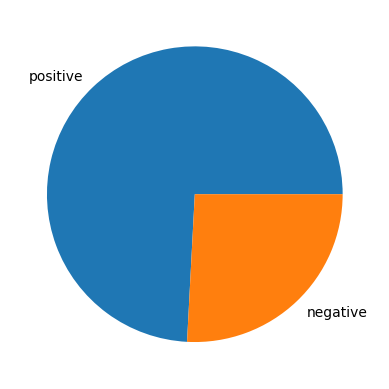

In [ ]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['positive','negative'])
plt.show()

## this is a imbalance dataset. to overcome this use SMOTE techniqe*italicized text*

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, vectorized_y_train_smote = smote.fit_resample(vectorized_X_train, y_train)

vectorized_x_train_smote1 = np.array(vectorized_x_train_smote)
vectorized_y_train_smote1 = np.array(vectorized_y_train_smote)

print(vectorized_x_train_smote1.shape)
print(vectorized_y_train_smote1.shape)

(9398, 1146)
(9398,)


In [ ]:
vectorized_y_train_smote.value_counts()

0    4699
1    4699
Name: label, dtype: int64

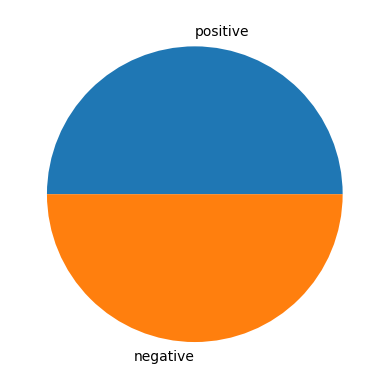

In [ ]:
plt.pie(np.array([vectorized_y_train_smote.value_counts()[0],vectorized_y_train_smote.value_counts()[1]]),labels=['positive','negative'])
plt.show()

## Model training and evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score

def training_score(y_act,y_pred):
  acc=round(accuracy_score(y_act,y_pred),3)
  pr=round(precision_score(y_act,y_pred),3)
  rec=round(recall_score(y_act,y_pred),3)
  f1=round(f1_score(y_act,y_pred),3)
  print(f'training score:\n\nAccuracy={acc}\n\nPrecision={pr}\n\nrecall={rec}\n\nf1_score={f1}')

def test_score(y_act,y_pred):
  acc=round(accuracy_score(y_act,y_pred),3)
  pr=round(precision_score(y_act,y_pred),3)
  rec=round(recall_score(y_act,y_pred),3)
  f1=round(f1_score(y_act,y_pred),3)
  print(f'test score:\n\nAccuracy={acc}\n\nPrecision={pr}\n\nrecall={rec}\n\nf1_score={f1}')

## Logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote1,vectorized_y_train_smote1)

LogisticRegression()

In [ ]:
y_train_pred=lr.predict(vectorized_x_train_smote1)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
vectorized_y_train_smote1

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
training_score(vectorized_y_train_smote1,y_train_pred)

training score:

Accuracy=0.941

Precision=0.918

recall=0.967

f1_score=0.942


## for test data

In [ ]:
y_test_pred=lr.predict(vectorized_X_test)
y_test_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_test

1831    0
972     0
5158    1
742     0
332     0
       ..
1360    0
2673    0
245     0
6076    0
3957    0
Name: label, Length: 1584, dtype: int64

In [ ]:
test_score(y_test,y_test_pred)

test score:

Accuracy=0.86

Precision=0.671

recall=0.846

f1_score=0.749


## Naive Bayes

In [ ]:
MNB=MultinomialNB()
MNB.fit(vectorized_x_train_smote1,vectorized_y_train_smote1)

y_train_pred=MNB.predict(vectorized_x_train_smote1)

y_test_pred=MNB.predict(vectorized_X_test)

training_score(vectorized_y_train_smote1,y_train_pred)

test_score(y_test,y_test_pred)

training score:

Accuracy=0.91

Precision=0.872

recall=0.961

f1_score=0.914
test score:

Accuracy=0.857

Precision=0.647

recall=0.915

f1_score=0.758


# Desicion Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote1,vectorized_y_train_smote1)

y_train_pred=dt.predict(vectorized_x_train_smote1)

y_test_pred=dt.predict(vectorized_X_test)

training_score(vectorized_y_train_smote1,y_train_pred)

test_score(y_test,y_test_pred)

training score:

Accuracy=1.0

Precision=1.0

recall=1.0

f1_score=1.0
test score:

Accuracy=0.827

Precision=0.644

recall=0.661

f1_score=0.652


## Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(vectorized_x_train_smote1,vectorized_y_train_smote1)

y_train_pred=rf.predict(vectorized_x_train_smote1)

y_test_pred=rf.predict(vectorized_X_test)

training_score(vectorized_y_train_smote1,y_train_pred)

test_score(y_test,y_test_pred)

training score:

Accuracy=1.0

Precision=1.0

recall=1.0

f1_score=1.0
test score:

Accuracy=0.878

Precision=0.751

recall=0.753

f1_score=0.752


## SVM

In [ ]:
svc=SVC()
svc.fit(vectorized_x_train_smote1,vectorized_y_train_smote1)

y_train_pred=svc.predict(vectorized_x_train_smote1)

y_test_pred=svc.predict(vectorized_X_test)

training_score(vectorized_y_train_smote1,y_train_pred)

test_score(y_test,y_test_pred)

training score:

Accuracy=0.978

Precision=0.962

recall=0.995

f1_score=0.978
test score:

Accuracy=0.871

Precision=0.71

recall=0.805

f1_score=0.754


In [ ]:
import os

# List the contents of the /content/ directory
contents = os.listdir('/content/')
print(contents)


['.config', 'drive', 'sentiment_model_lr.pickle', 'sample_data']


In [ ]:
import pickle

# Save the model as a pickle file
# Specify the path to save the pickle file in Google Colab

file_path = '/content/drive/MyDrive/sentiment_model_lr.pickle'

with open(file_path, 'wb') as f:
    pickle.dump(lr, f)